<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Related Nature publication
https://www.nature.com/articles/nphys4035

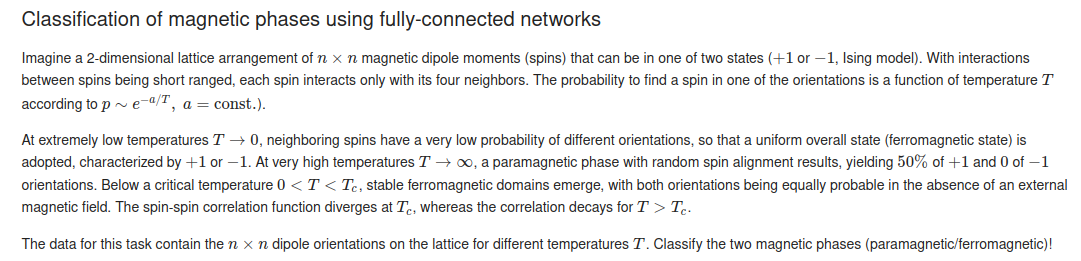

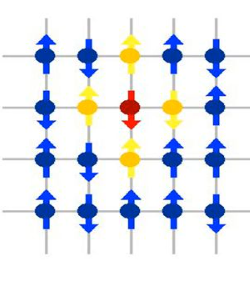

In [1]:
from tensorflow import keras
import numpy as np
#callbacks = keras.callbacks
layers = keras.layers

import gdown

url = "https://swmukher.web.cern.ch/swmukher/ising_data.npz"
output = 'ising_data.npz'
gdown.download(url, output, quiet=True)
f = np.load(output, allow_pickle=True)
f


NpzFile 'ising_data.npz' with keys: C, T

In [2]:
np.shape(f['C'])

(26000, 32, 32)

In [3]:
#np.shape(f['T'])
f['T']

array([3.1, 1.8, 1. , ..., 1.7, 3.5, 2.5])

In [4]:
n_train = 20000

x_train, x_test = f["C"][:n_train], f["C"][n_train:] # spin in 2D array
T_train, T_test = f["T"][:n_train], f["T"][n_train:] # temp

In [5]:
np.shape(x_train)

(20000, 32, 32)

In [6]:
np.shape(x_test)

(6000, 32, 32)

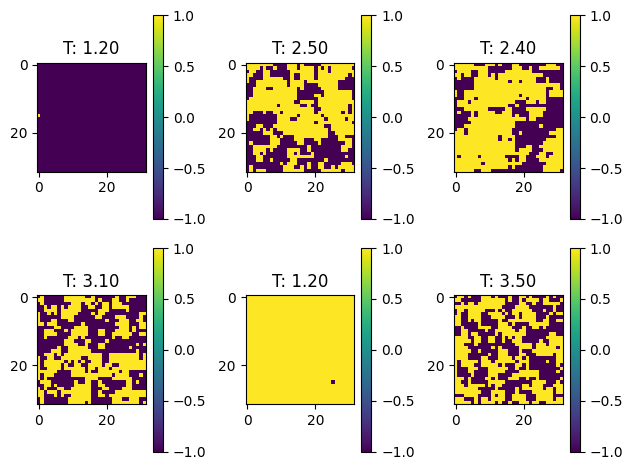

In [7]:
import matplotlib.pyplot as plt

for i,j in enumerate(np.random.choice(n_train, 6)):
    plt.subplot(2,3,i+1)
    image = x_train[j]
    plot = plt.imshow(image)
    plt.title("T: %.2f" % T_train[j])
    plt.colorbar()


plt.tight_layout()
plt.show()

In [14]:
n=np.where((T_train>2.25) & (T_train<2.31))[0]
np.shape(n)

(787,)

In [16]:
n

array([   19,    65,   102,   105,   148,   188,   200,   212,   220,
         223,   225,   243,   318,   329,   348,   355,   431,   491,
         686,   704,   709,   714,   732,   750,   767,   770,   841,
         852,   857,   861,   866,   879,   880,   884,   891,   894,
         899,   916,   928,   952,   960,   975,  1000,  1048,  1062,
        1065,  1109,  1122,  1166,  1176,  1196,  1214,  1226,  1300,
        1317,  1326,  1348,  1429,  1437,  1475,  1506,  1519,  1520,
        1525,  1574,  1616,  1637,  1641,  1658,  1695,  1704,  1737,
        1758,  1794,  1804,  1827,  1857,  1872,  1909,  1937,  1945,
        1957,  1961,  1975,  2007,  2025,  2031,  2063,  2099,  2141,
        2143,  2159,  2197,  2200,  2207,  2235,  2305,  2336,  2447,
        2449,  2470,  2547,  2559,  2592,  2599,  2645,  2650,  2707,
        2774,  2799,  2804,  2855,  2875,  2891,  2934,  2937,  2971,
        2983,  3022,  3055,  3065,  3105,  3159,  3162,  3164,  3172,
        3185,  3194,

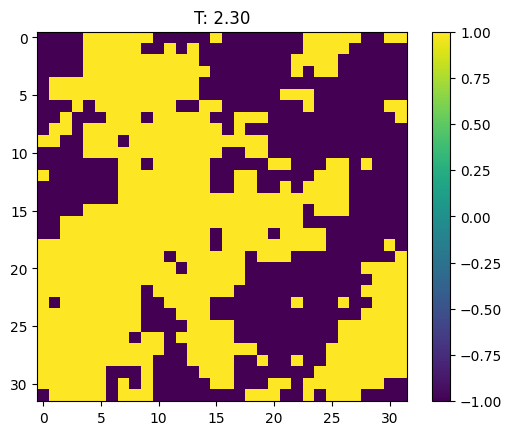

In [17]:
j=19979
image = x_train[j]
plot = plt.imshow(image)
plt.title("T: %.2f" % T_train[j])
plt.colorbar()
plt.show()

Text(0, 0.5, 'number of entries')

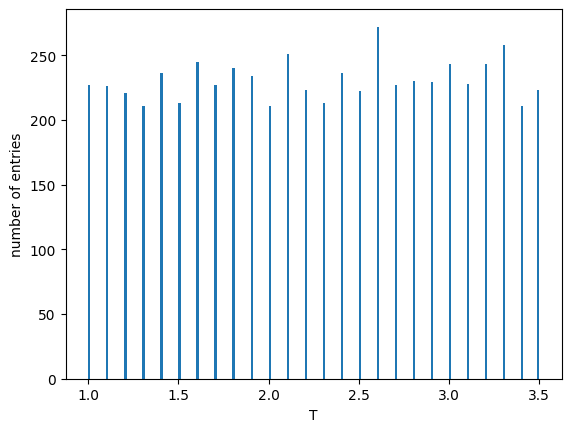

In [19]:
plt.hist(T_test, bins=200)
plt.xlabel("T")
plt.ylabel("number of entries")

In [20]:
Tc = 2.27
y_train = T_train > Tc
np.shape(y_train)

(20000,)

In [21]:
y_train

array([ True, False, False, ..., False,  True,  True])

In [22]:
y_test = T_test > Tc


In [23]:
y_test

array([False, False,  True, ..., False,  True,  True])

In [24]:
model = keras.models.Sequential()
model.add(layers.InputLayer(input_shape=(32, 32, 1)))
model.add(layers.Reshape((1024,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          16,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,689 (65.19 KB)

 Trainable params: 16,689 (65.19 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'])

Keras can separate a portion of your training data into a validation dataset and evaluate the performance of your model on that validation dataset in each epoch. You can do this by setting the validation_split argument in the `fit()` function to a percentage of the size of your training dataset.

In [26]:
results = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=50,
                    verbose=2,
                    validation_split=0.1,
                    #callbacks=[
                     #   callbacks.EarlyStopping(patience=5, verbose=1),
                      #  callbacks.ReduceLROnPlateau(factor=0.67, patience=2, verbose=1)]
                    )


Epoch 1/50
282/282 - 3s - 9ms/step - accuracy: 0.7991 - loss: 0.4080 - val_accuracy: 0.9665 - val_loss: 0.1303
Epoch 2/50
282/282 - 1s - 2ms/step - accuracy: 0.9064 - loss: 0.2376 - val_accuracy: 0.9730 - val_loss: 0.0982
Epoch 3/50
282/282 - 1s - 5ms/step - accuracy: 0.9198 - loss: 0.1946 - val_accuracy: 0.9710 - val_loss: 0.0981
Epoch 4/50
282/282 - 1s - 4ms/step - accuracy: 0.9300 - loss: 0.1761 - val_accuracy: 0.9695 - val_loss: 0.1091
Epoch 5/50
282/282 - 1s - 2ms/step - accuracy: 0.9414 - loss: 0.1587 - val_accuracy: 0.9730 - val_loss: 0.0939
Epoch 6/50
282/282 - 1s - 4ms/step - accuracy: 0.9486 - loss: 0.1481 - val_accuracy: 0.9695 - val_loss: 0.1035
Epoch 7/50
282/282 - 1s - 2ms/step - accuracy: 0.9507 - loss: 0.1368 - val_accuracy: 0.9715 - val_loss: 0.0980
Epoch 8/50
282/282 - 1s - 5ms/step - accuracy: 0.9548 - loss: 0.1275 - val_accuracy: 0.9710 - val_loss: 0.0944
Epoch 9/50
282/282 - 1s - 2ms/step - accuracy: 0.9546 - loss: 0.1258 - val_accuracy: 0.9730 - val_loss: 0.0957
E

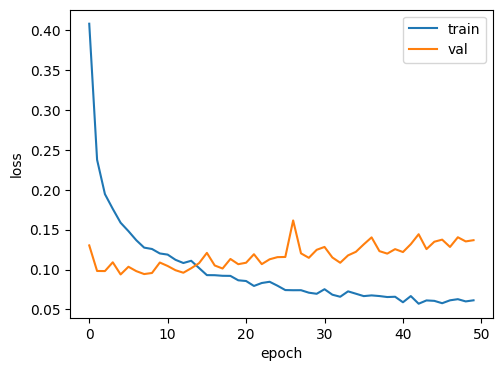

In [27]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

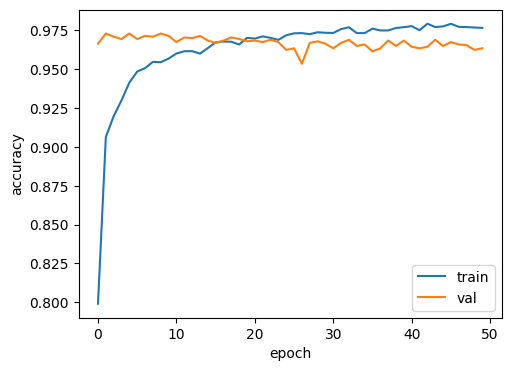

In [28]:
plt.figure(1, (12, 4))
plt.subplot(1, 2, 1)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [29]:
a = model.evaluate(x_test, y_test, verbose=0)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


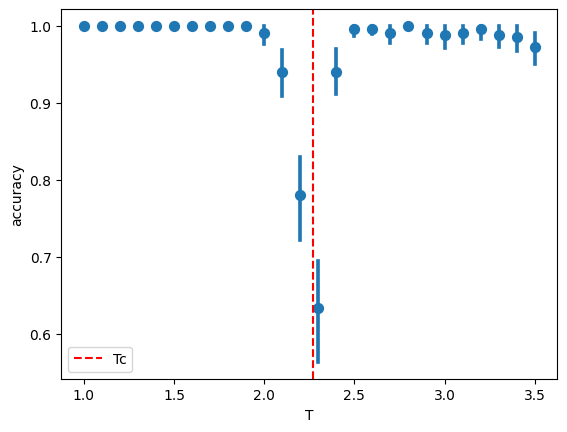

In [30]:
import seaborn as sns

preds = model.predict(x_test).round().squeeze()
acc = (preds == y_test)

ax = sns.regplot(x=T_test, y=acc, x_estimator= np.mean, fit_reg=False)
ax.set_ylabel("accuracy")
ax.set_xlabel("T")
plt.axvline(x=Tc, color='red', linestyle='--', label='Tc')
plt.legend(loc="lower left")

In [31]:
preds

array([0., 0., 1., ..., 0., 1., 1.], dtype=float32)

In [32]:
model.predict(x_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.3694291e-03],
       [1.1516695e-04],
       [9.9057460e-01],
       ...,
       [1.3489218e-04],
       [1.0000000e+00],
       [9.9999619e-01]], dtype=float32)

In [33]:
model.predict(x_test).round()

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [34]:
model.predict(x_test).round().squeeze()

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([0., 0., 1., ..., 0., 1., 1.], dtype=float32)

In [35]:
y_test

array([False, False,  True, ..., False,  True,  True])

In [36]:
print (acc)

[ True  True  True ...  True  True  True]
